# AutoML with AutoGluon for Multi-Modal Data

__Amazon Product Reviews__:
This is a large crawl of product reviews from Amazon. This dataset contains 82.83 million unique reviews, from around 20 million users.

[Justifying recommendations using distantly-labeled reviews and fined-grained aspects](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/)
`Jianmo Ni`, `Jiacheng Li`, `Julian McAuley`
_Empirical Methods in Natural Language Processing (EMNLP), 2019_

## Sentiment Analysis for 5-star Ratings

In [6]:
!wget https://github.com/willfry01/Amazon-Reviews-Sentiment/raw/master/preprocessed_kindle_review%20.csv -P dataset

--2023-06-23 17:33:20--  https://github.com/willfry01/Amazon-Reviews-Sentiment/raw/master/preprocessed_kindle_review%20.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/willfry01/Amazon-Reviews-Sentiment/master/preprocessed_kindle_review%20.csv [following]
--2023-06-23 17:33:21--  https://raw.githubusercontent.com/willfry01/Amazon-Reviews-Sentiment/master/preprocessed_kindle_review%20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7620879 (7.3M) [text/plain]
Saving to: ‘dataset/preprocessed_kindle_review .csv’

preprocessed_kin

In [ ]:
# error importing vowpalwabbit
!pip install vowpalwabbit==9.4 
# AttributeError: module 'wandb.sdk' has no attribute 'lib'
!pip install --force shortuuid==1.0.1
# AttributeError: module 'dns.rdtypes' has no attribute 'ANY'
!pip install eventlet==0.33.3

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.multimodal import MultiModalPredictor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

2023-06-23 22:13:33.143773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
SEED = 42
MODEL_PATH = 'model'

### Data Preprocessing

In [3]:
data = TabularDataset('dataset/kindle_review.csv')
data.head(5)

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


|    | Unnamed: 0 | rating | reviewText | summary |
| -- | -- | -- | -- | -- |
| 0 | 0 | 5 | This book was the very first bookmobile book I... | 50 + years ago... |
| 1 | 1 | 1 | When I read the description for this book, I c... | Boring! Boring! Boring! |
| 2 | 2 | 5 | I just had to edit this review. This book is a... | Wiggleliscious/new toy ready/!! |
| 3 | 3 | 5 | I don't normally buy 'mystery' novels because ... | Very good read. |
| 4 | 4 | 5 | This isn't the kind of book I normally read, a... | Great Story! |

In [6]:
data['reviewText'].iloc[0]
# 'This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.'

'This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.'

In [12]:
# train / test split
len(data)*0.8
# 9600

9600

In [4]:
train_data = data.sample(frac=0.8 , random_state=SEED)
test_data = data.drop(train_data.index)

### Model Training

In [9]:
nlp_predictor = TabularPredictor(label='rating', path=MODEL_PATH)

In [10]:
# my GPU runs out of VRAM -> deactivate GPU accelleration
nlp_predictor.fit(train_data, hyperparameters='multimodal', num_cpus='auto', num_gpus=0)
# AutoGluon infers your prediction problem is: 'multiclass'
#	5 unique label values:  [4, 3, 5, 2, 1]

# Fitting CountVectorizer for text features: ['reviewText', 'summary']
# 			CountVectorizer fit with vocabulary size = 6873

# Fitting model: WeightedEnsemble_L2 ...
# 	0.5604	 = Validation score   (accuracy)
# 	0.24s	 = Training   runtime
# 	0.0s	 = Validation runtime
# AutoGluon training complete, total runtime = 409.69s ... Best model: "WeightedEnsemble_L2"

Beginning AutoGluon training ...
AutoGluon will save models to "model/"
AutoGluon Version:  0.8.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Tue May 30 23:14:35 UTC 2023
Disk Space Avail:   64.94 GB / 500.10 GB (13.0%)
Train Data Rows:    9600
Train Data Columns: 3
Label Column: rating
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [4, 3, 5, 2, 1]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    25354.95 MB
	Train Data (Original)  Memory Usage: 7.14 MB (0.0% of ava

### Model Evaluation

In [16]:
# run test prediction
test_rating_from_csv = TabularDataset('dataset/test_rating.csv')
nlp_predictor.predict(test_rating_from_csv)
# 0    2
# 1    4
# 2    5
# Name: rating, dtype: int64

Loaded data from: dataset/test_rating.csv | Columns = 4 / 4 | Rows = 3 -> 3


0    2
1    4
2    5
Name: rating, dtype: int64

In [12]:
X_test = test_data.drop(columns=['rating'], axis=1)
y_test = test_data['rating']

In [13]:
y_pred = nlp_predictor.predict(X_test)
metrics = nlp_predictor.evaluate_predictions(
    y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

# Evaluation: accuracy on test data: 0.5391666666666667
# Evaluations on test data:
# {
#     "accuracy": 0.5391666666666667,
#     "balanced_accuracy": 0.5208083196216325,
#     "mcc": 0.4154247244832002
# }

Evaluation: accuracy on test data: 0.5391666666666667
Evaluations on test data:
{
    "accuracy": 0.5391666666666667,
    "balanced_accuracy": 0.5208083196216325,
    "mcc": 0.4154247244832002
}


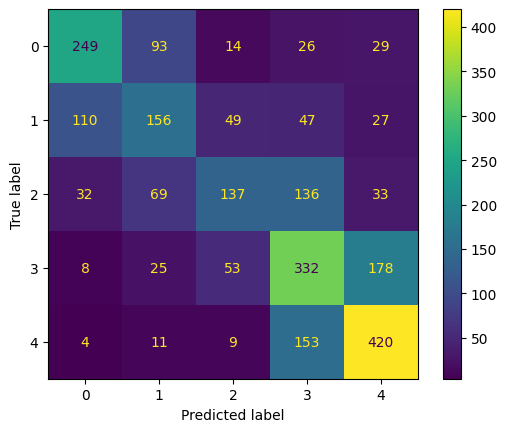

In [14]:
confusion = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred)
)

confusion.plot(cmap='viridis')

plt.savefig('assets/Multi-Class_Classification_NLP_10.webp', bbox_inches='tight')

![AutoML with AutoGluon for Multi-Modal Data](./assets/Multi-Class_Classification_NLP_10.webp)

## Binary Classification with the MultiModalPredictor

In [44]:
# Spam Mails Dataset https://www.kaggle.com/datasets/venky73/spam-mails-dataset
!wget https://github.com/MSc-AI/SpamEmail/raw/main/spam_ham_dataset.csv -P dataset

--2023-06-23 19:55:01--  https://github.com/MSc-AI/SpamEmail/raw/main/spam_ham_dataset.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MSc-AI/SpamEmail/main/spam_ham_dataset.csv [following]
--2023-06-23 19:55:02--  https://raw.githubusercontent.com/MSc-AI/SpamEmail/main/spam_ham_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400995 (5.2M) [text/plain]
Saving to: ‘dataset/spam_ham_dataset.csv’

spam_ham_dataset.cs 100%[===================>]   5.15M  2.54MB/s    in 2.0s    

2023-06-23 19:55:06 (2.54 MB/s) - ‘dataset/

### Data Preprocessing

In [3]:
spam_data = TabularDataset('dataset/spam_ham_dataset.csv')

In [13]:
spam_data.head(5)

,Unnamed: 0,label,text
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ..."
4,2030,ham,Subject: re : indian springs\nthis deal is to ...


|   | Unnamed: 0 | label | text | label_num |
| -- | -- | -- | -- | -- |
| 0 | 605 | ham | Subject: enron methanol ; meter # : 988291\nth... | 0 |
| 1 | 2349 | ham | Subject: hpl nom for january 9 , 2001\n( see a... | 0 |
| 2 | 3624 | ham | Subject: neon retreat\nho ho ho , we ' re arou... | 0 |
| 3 | 4685 | spam | Subject: photoshop , windows , office . cheap ... | 1 |
| 4 | 2030 | ham | Subject: re : indian springs\nthis deal is to ... | 0 |

In [12]:
# drop second label
spam_data = spam_data.drop(columns=['label_num'], axis=1)

In [14]:
spam_data['label'].value_counts()
# ham     3672
# spam    1499
# Name: label, dtype: int64

ham     3672
spam    1499
Name: label, dtype: int64

In [15]:
# train / test split
spam_train_data = spam_data.sample(frac=0.8 , random_state=SEED)
spam_test_data = spam_data.drop(spam_train_data.index)

### Model Training

In [16]:
mm_predictor = MultiModalPredictor(label='label', path=MODEL_PATH)

In [ ]:
mm_predictor.fit(spam_train_data)

### Model Evaluation

In [18]:
mm_predictor = MultiModalPredictor.load('model/')

/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.1.3 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Load pretrained checkpoint: /run/media/xiaodie/dev/automl-gluon-tabular-data/03_Multi-Class_Classification_NLP/model/model.ckpt


In [ ]:
model_scoring = mm_predictor.evaluate(spam_test_data, metrics=['acc', 'f1'])
print(model_scoring)
# {'acc': 0.965183752417795, 'f1': 0.9400000000000001}

In [21]:
test_email1 = "Hi,\n We specialize in developing custom software and related applications and we can develop cost effective and high quality software for you. A brief introduction of what we do is given below:\n Web Design.\n Web Development\n Android & IOS App Development.\n Website Maintenance\n Digital Marketing\n Graphics Designing.\n SEO SMO Adword.\n We are sincerely looking at the prospect of a mutually beneficial relationship with you and your company and to the opportunities the future may bring.\n Regards"
test_email2 = "Tell them I hate them. Is the Space Pope reptilian!? Tell her she looks thin. Hello, little man. I will destroy you! I've got to find a way to escape the horrible ravages of youth. Suddenly, I'm going to the bathroom like clockwork, every three hours. And those jerks at Social Security stopped sending me checks. Now 'I' have to pay them'!"

In [23]:
mm_predictor.predict({'text':[test_email1,test_email2]})
# array(['spam', 'ham'], dtype=object)

array(['spam', 'ham'], dtype=object)

In [25]:
print(mm_predictor.class_labels)
mm_predictor.predict_proba({'text':[test_email1,test_email2]})
# ['ham' 'spam']
# array([[0.02339679, 0.97660315],
#        [0.91861194, 0.08138806]], dtype=float32)

['ham' 'spam']


array([[0.02339679, 0.97660315],
       [0.91861194, 0.08138806]], dtype=float32)